In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from scipy.stats import chisquare

# Allstate Claims Severity
#### By Tinh Nguyen, Suman Tripathy, AC Dela Paz, Joelynn Deng

In [2]:
# Importing data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")   # save til end

train_y = train['loss']
train_X = train.drop('loss', axis=1)

In [3]:
train_X = train_X.drop('id', axis=1)

In [4]:
local_train_X, local_test_X, local_train_y, local_test_y = train_test_split(train_X, train_y, test_size=0.2) 

## Data Exploration

In this section of the notebook, we'll conduct
 - Null values
 - Standard statistical analysis
 - Correlation

In [5]:
print(list(train.columns))

['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', '

In [6]:
print("Number of null values: ", train.isnull().sum().sum())

Number of null values:  0


In [7]:
local_train_X.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000
mean,0.493967,0.507165,0.498869,0.492037,0.487580,0.490991,0.484789,0.486532,0.485582,0.498144,0.493409,0.493024,0.493247,0.495902
std,0.187615,0.207113,0.202001,0.211215,0.209056,0.205348,0.178106,0.199514,0.181682,0.185845,0.209708,0.209372,0.212902,0.222464
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.347403,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.308395,0.315758,0.294772
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407411
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.654224,0.590687,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724635
max,0.984975,0.862654,0.944251,0.952482,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844844


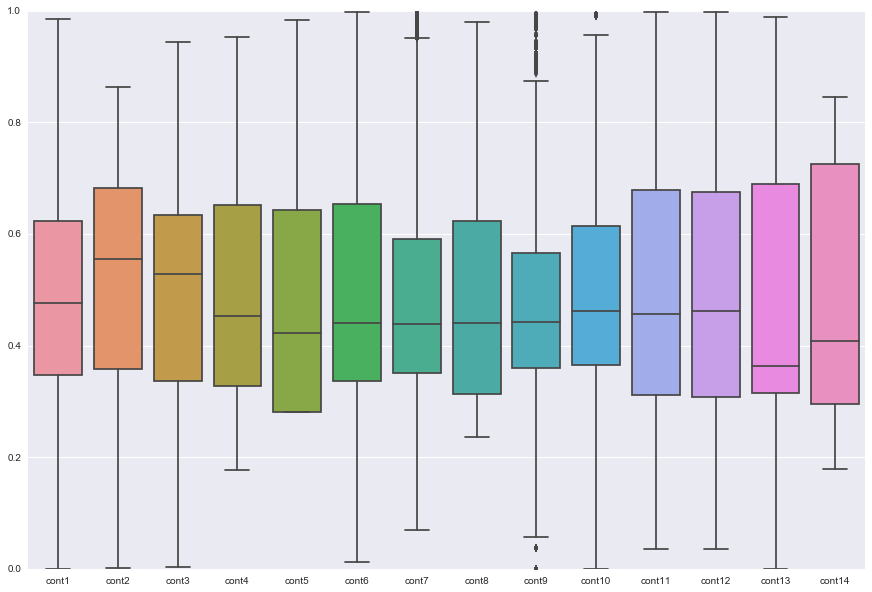

In [8]:
p = re.compile('cont[0-9]+')

cont_features = [c for c in train.columns if p.match(c)]
plt.figure(figsize=(15, 10))
sns.boxplot(data=local_train_X[cont_features])

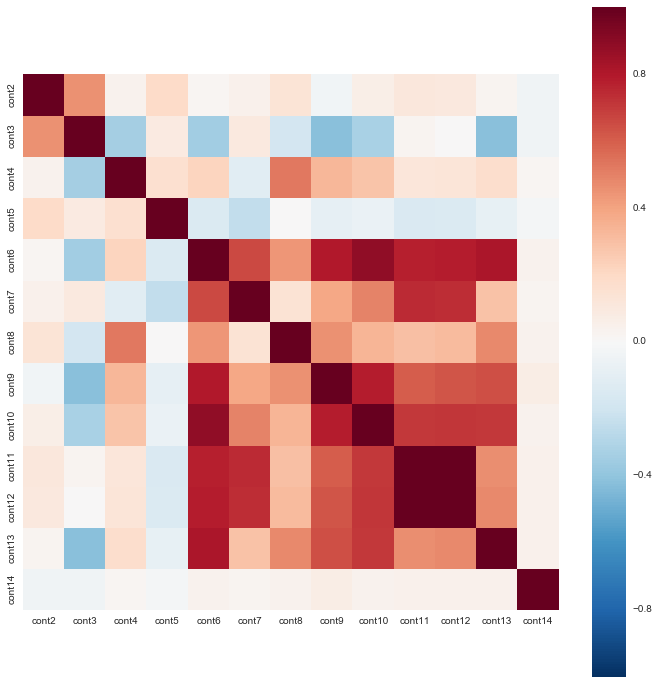

In [9]:
corr = local_train_X[cont_features].iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [10]:
# What are the most correlated variables?
s = corr.abs().unstack()
sorted_corr = s.order(kind='quicksort', ascending=False)
sorted_corr = sorted_corr[sorted_corr != 1.0]

/Users/tinhnguyen/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


In [11]:
# Top 10 Correlations
sorted_corr.drop_duplicates()[:10]

cont11  cont12    0.994449
cont6   cont10    0.883550
cont13  cont6     0.815522
cont6   cont9     0.797959
cont9   cont10    0.785342
cont12  cont6     0.784952
cont6   cont11    0.773747
cont11  cont7     0.746587
cont7   cont12    0.742091
cont10  cont12    0.714099
dtype: float64

## Feature Engineering

Take a look at dmi3kno's kernel on feature engineering. (https://www.kaggle.com/dmi3kno/allstate-claims-severity/all-the-allstate-states-eda/code)
    - Can we extract states from the data?
    - From dmi3kno's kernel, we gain some insight to see how to make sense of the categorical variables.
    - Looking at cat112, there are 51, So let's try to cross correlate with population data (https://www.census.gov/popest/data/state/totals/2015/tables/NST-EST2015-01.csv)

In [14]:
# Number of unique variables for each column
[(col, train[col].nunique() == test[col].nunique()) for col in test.columns]

[('id', False),
 ('cat1', True),
 ('cat2', True),
 ('cat3', True),
 ('cat4', True),
 ('cat5', True),
 ('cat6', True),
 ('cat7', True),
 ('cat8', True),
 ('cat9', True),
 ('cat10', True),
 ('cat11', True),
 ('cat12', True),
 ('cat13', True),
 ('cat14', True),
 ('cat15', True),
 ('cat16', True),
 ('cat17', True),
 ('cat18', True),
 ('cat19', True),
 ('cat20', True),
 ('cat21', True),
 ('cat22', True),
 ('cat23', True),
 ('cat24', True),
 ('cat25', True),
 ('cat26', True),
 ('cat27', True),
 ('cat28', True),
 ('cat29', True),
 ('cat30', True),
 ('cat31', True),
 ('cat32', True),
 ('cat33', True),
 ('cat34', True),
 ('cat35', True),
 ('cat36', True),
 ('cat37', True),
 ('cat38', True),
 ('cat39', True),
 ('cat40', True),
 ('cat41', True),
 ('cat42', True),
 ('cat43', True),
 ('cat44', True),
 ('cat45', True),
 ('cat46', True),
 ('cat47', True),
 ('cat48', True),
 ('cat49', True),
 ('cat50', True),
 ('cat51', True),
 ('cat52', True),
 ('cat53', True),
 ('cat54', True),
 ('cat55', True),
 ('

In [15]:
state_pop = pd.read_csv('https://www.census.gov/popest/data/state/totals/2015/tables/NST-EST2015-01.csv')
# Grabbing necessary rows only
new_columns = state_pop.loc[2, :]
new_columns[0] = 'State'
state_pop = state_pop.loc[range(8, 59),:]
state_pop.columns = new_columns

In [16]:
# Converting from string ('249,924' -> 249924.0)
int_cols = ['Census', 'Estimates Base', '2010', '2011', '2012', '2013', '2014', '2015']
for col in int_cols:
    state_pop[col] = state_pop[col].map(lambda x: x.replace(',', '')).astype(float)

In [17]:
total_pop = state_pop['Census'].sum()
state_pop['freq'] = state_pop['Census']/total_pop
state_pop.head()

2,State,Census,Estimates Base,2010,2011,2012,2013,2014,2015,freq
8,.Alabama,4779736.0,4780127.0,4785161.0,4801108.0,4816089.0,4830533.0,4846411.0,4858979.0,0.015481
9,.Alaska,710231.0,710249.0,714021.0,722720.0,731228.0,737442.0,737046.0,738432.0,0.002300
10,.Arizona,6392017.0,6392307.0,6408208.0,6468732.0,6553262.0,6630799.0,6728783.0,6828065.0,0.020703
11,.Arkansas,2915918.0,2915958.0,2922394.0,2938538.0,2949499.0,2957957.0,2966835.0,2978204.0,0.009444
12,.California,37253956.0,37254503.0,37334079.0,37700034.0,38056055.0,38414128.0,38792291.0,39144818.0,0.120662


In [18]:
possible_state_freq = local_train_X['cat112'].value_counts()
possible_state_freq = possible_state_freq.sort_values(ascending=False) / possible_state_freq.sum()
allState_state = possible_state_freq.axes[0].tolist()

In [19]:
state_order = state_pop.sort_values(by='freq', ascending=False)['State'].map(lambda x: x.replace('.', ''))
state_order = state_order.tolist()


In [20]:
print('Label', 'Predicted-State')
for i, j in enumerate(allState_state):
    print(j, state_order[i])

Label Predicted-State
E California
AH Texas
AS New York
J Florida
AF Illinois
AN Pennsylvania
N Ohio
U Michigan
AV Georgia
AK North Carolina
K New Jersey
AI Virginia
S Washington
AP Massachusetts
G Indiana
F Arizona
AW Tennessee
A Missouri
AR Maryland
C Wisconsin
O Minnesota
D Colorado
AD Alabama
AY South Carolina
Y Louisiana
AG Kentucky
AT Oregon
AA Oklahoma
AM Connecticut
R Iowa
AL Mississippi
AX Arkansas
I Kansas
X Utah
Q Nevada
AE New Mexico
V West Virginia
AO Nebraska
H Idaho
T Hawaii
L Maine
AC New Hampshire
W Rhode Island
AU Montana
M Delaware
B South Dakota
P Alaska
AB North Dakota
BA Vermont
AJ District of Columbia
AQ Wyoming


Just from inspection, this seems like a good argument. We have gained some intuition that 'cat112' may be the state column. We'll conduct a chi-squared test, the observed data being our all-state state distribution and predicted being census population data.

In [21]:
chi, p = chisquare(possible_state_freq, state_pop['freq'])
print(p, chi)

0.999999999999 7.87586794811


A p-value of 0.9999 indicates that our null hypothesis is very likely (almost 100%) to be true. Thus, we can be confident in assuming these are the correct labels for states.

So let's make this modification across all datasets.

In [22]:
# So let's map our categorical variables in cat112 to statenames
local_train_X['cat112'] = local_train_X['cat112'].map(lambda x: state_order[allState_state.index(x)])
local_test_X['cat112'] = local_test_X['cat112'].map(lambda x: state_order[allState_state.index(x)])
test['cat112'] = test['cat112'].map(lambda x: state_order[allState_state.index(x)])

/Users/tinhnguyen/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/tinhnguyen/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Additionally, let's transform all the categorical variables to numbers. Each category is given a specific number (number only represents category, comparisons other than != do not mean anything).

In [23]:
for col in local_train_X.columns:
    if re.match('cat[0-9]+', col):
        s = np.union1d(train[col].unique().tolist(), test[col].unique().tolist()).tolist()
        local_train_X[col] = local_train_X[col].map(lambda x: s.index(x))
        local_test_X[col] = local_test_X[col].map(lambda x: s.index(x))
        test[col] = test[col].map(lambda x: s.index(x))

/Users/tinhnguyen/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tinhnguyen/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## An Attempt at Gradient Boosting (XGB)

Special thanks to <b>guyko</b> for an introduction to xgb package. (https://www.kaggle.com/guyko81/allstate-claims-severity/just-an-easy-solution/)

#### Installation Instructions

 - git clone https://github.com/dmlc/xgboost.git
 - cd xgboost; ./build.sh
 - cd python-package; python setup.py install

In [52]:
from scipy.stats import norm, lognorm
import xgboost as xgb

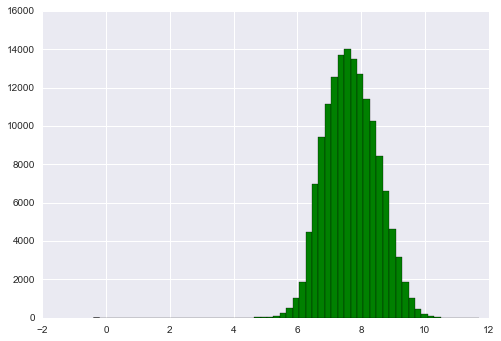

In [53]:
log_loss = np.log(local_train_y)
mu, sigma = norm.fit(log_loss)
plt.hist(log_loss, bins=60, facecolor='green')
plt.show()

From the looks of the log-loss distribution, it seems to be normally distributed.